<a href="https://colab.research.google.com/github/Hironobu-Kawaguchi/HappyRedHair/blob/main/POI_NMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


####### DEMO_SimpleDetourコードからの入力情報と返り値(推論時)######

# User ID ユーザーの識別番号
USER_ID = 1
# 空き時間と現在地等によって選ばれた候補地
selected_list = [1,3,4,7,10,14,15,18]

In [ ]:
# 疑似データ作成
# 行列(user_id,spot_id)
# 要素：訪れたか訪れていないかの2値、1が訪問、0が未訪問
user_num = 30
spot_num = 20
X_mat = np.random.choice([0.0, 1.0], (user_num, spot_num))
print(X_mat)



# 未訪問の地点の確率を0から乱数値に置き換え
print("Regard zero-elements as missing data '?' with probability p")

p = 0.9
for user_id in range(user_num):
    for spot_id in range(spot_num):
        # Regard zero-elements as missing data "?" with probability p
        if X_mat[user_id,spot_id] == 0:
            threshold = np.random.rand()
#             print(threshold)
            if threshold < p:
                X_mat[user_id,spot_id] = threshold
#                 print(X_mat[user_id,spot_id])

print(X_mat)

[[1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1.]
 [0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
 [0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.

# 学習

W: (30, 2) H: (2, 20)


/Users/haseryo/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


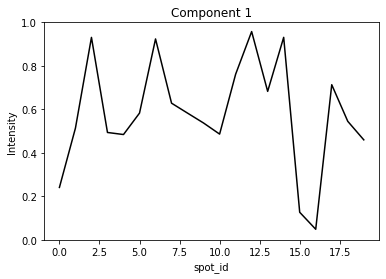

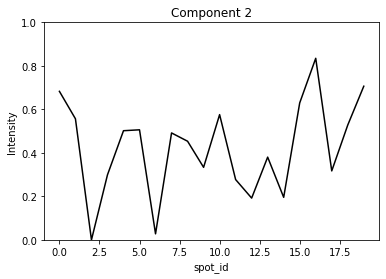

In [ ]:
from sklearn.decomposition import NMF
# 基底の数
n_components = 2

nmf = NMF(n_components=n_components, init='random', random_state=1)
W = nmf.fit_transform(X_mat)
H = nmf.components_
print("W:",W.shape,"H:",H.shape)
for count in range(0,n_components):
    plt.plot(H[count],c="black")
    plt.xlabel("spot_id")
    plt.ylabel("Intensity")
    plt.title("Component "+str(count+1))
    plt.ylim(0,1)
    plt.show()

# 推論

In [ ]:
X_mat_pred = np.dot(W,H)
X_mat_pred = X_mat_pred/np.max(X_mat_pred)
print(X_mat_pred.shape)
print(np.max(X_mat_pred))
print(np.min(X_mat_pred))
print(np.mean(X_mat_pred))

(30, 20)
1.0
0.0
0.6204123987867777


In [ ]:
# DEMO_SimpleDetourからの入力情報
# たくさんある候補(selected_list)の中から1つをレコメンドしたい

print("USER_ID:",USER_ID, "selected_list:",selected_list)

best_poi_id = selected_list[np.argmax(X_mat_pred[USER_ID][selected_list])]
print(f"the best POI for recommending to user:{USER_ID}, spot_id:",best_poi_id)

USER_ID: 1 selected_list: [1, 3, 4, 7, 10, 14, 15, 18]
the best POI to recommend to user:1, spot_id: 14
